# Acknowledgements

---

Dataset ini di download dari [https://finance.yahoo.com/](https://finance.yahoo.com/quote/EURUSD=X?p=EURUSD=X&.tsrc=fin-srch)

# Import Necessary Library

---

Import library yang akan digunakan untuk data analisis, data visualisasi, data preprocessing dan modeling

In [ ]:
# library for data loading and data analysis
import pandas as pd
import numpy as np

# library for data visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# library for data preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# library for modeling
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Data Loading

---



In [ ]:
path = 'EURUSD=X.csv'
df = pd.read_csv(path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0.0
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0.0
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0.0
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0.0
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0.0


In [ ]:
print(f'The data has {df.shape[0]} records and {df.shape[1]} columns.')

The data has 4886 records and 7 columns.


# Exploratory Data Analysis

---

Dataset ini memiliki 4886 baris data dan 7 kolom :


*   Date : Tanggal data tersebut direkam
*   Open : Harga pembukaan pada hari tersebut
*   High : Harga tertinggi pada hari tersebut
*   Low : Harga terendah pada hari tersebut
*   Close : Harga penutupan pada hari tersebut
*   Adj Close (Adjusted Close) : Harga penutupan pada hari tersebut setelah disesuaikan dengan aksi korporasi seperti *right issue*,  *stock split* atau *stock reverse*
*   Volume : Banyaknya transaksi pada hari tersebut

### Mengecek data apakah memiliki missing value atau tidak

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4886 entries, 0 to 4885
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4886 non-null   object 
 1   Open       4857 non-null   float64
 2   High       4857 non-null   float64
 3   Low        4857 non-null   float64
 4   Close      4857 non-null   float64
 5   Adj Close  4857 non-null   float64
 6   Volume     4857 non-null   float64
dtypes: float64(6), object(1)
memory usage: 267.3+ KB


Dapat kita lihat bahwa dataframe memiliki missing value. Setelah mengetahui bahwa ada missing value pada dataframe, selanjutnya mengecek dimana kolom mana saja yang memiliki missing value

In [ ]:
print('Total missing value in the dataframe:', df.isnull().sum().sum(), 'records')

Total missing value in the dataframe: 174 records


In [ ]:
print('Columns with missing value:')
print(df.isnull().sum())

Columns with missing value:
Date          0
Open         29
High         29
Low          29
Close        29
Adj Close    29
Volume       29
dtype: int64


Seperti yang kita lihat bahwa semua kolom memiliki missing value kecuali date. Secara umum, jika terdapat missing value maka missing value tersebut akan diisi dari mean (nilai rata-rata) dari kolom masing-masing. Hal tersebut dapat kita lakukan menggunakan library SimpleImputer

In [ ]:
col_with_missing = [col for col in df.columns if df[col].isnull().any()]
print('Column with missing value:', col_with_missing)

Column with missing value: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [ ]:
imputer = SimpleImputer()
df[col_with_missing] = imputer.fit_transform(df[col_with_missing])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0.0
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0.0
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0.0
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0.0
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0.0


In [ ]:
print('Total missing value in the dataframe:', df.isnull().sum().sum(), 'records')

Total missing value in the dataframe: 0 records


### Explore Statistic Information

Secara umum, sebuah data pasti memiliki informasi statistik pada masing-masing kolom, antara lain:


*   Count : Jumlah data pada setiap kolom
*   Mean : Nilai rata-rata pada setiam kolom
*   Std : Standar deviasi pada setiap kolom
*   Min : Nilai minimum pada setiap kolom
*   25% : Kuartil pertama
*   50% : Kuartil kedua atau biasa juga disebut median (nilai tengah)
*   75% : Kuartil ketiga
*   Max : Nilai maksimum pada setiap kolom



In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4886.000000,4886.000000,4886.000000,4886.000000,4886.000000,4886.0
mean,1.249362,1.254032,1.244236,1.249388,1.249388,0.0
std,0.121282,0.122030,0.121791,0.121273,0.121273,0.0
min,1.002567,1.003915,0.072902,1.002567,1.002567,0.0
25%,1.139705,1.143387,1.136020,1.139767,1.139767,0.0
50%,1.238704,1.243595,1.233639,1.238896,1.238896,0.0
75%,1.336005,1.340847,1.330821,1.336072,1.336072,0.0
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0


### Data visualiation

Yang pertama akan kita visualisasikan adalah mencari outlier pada data. Untuk mencari outlier pada data, kita akan menggunakan boxplot dari library seaborn

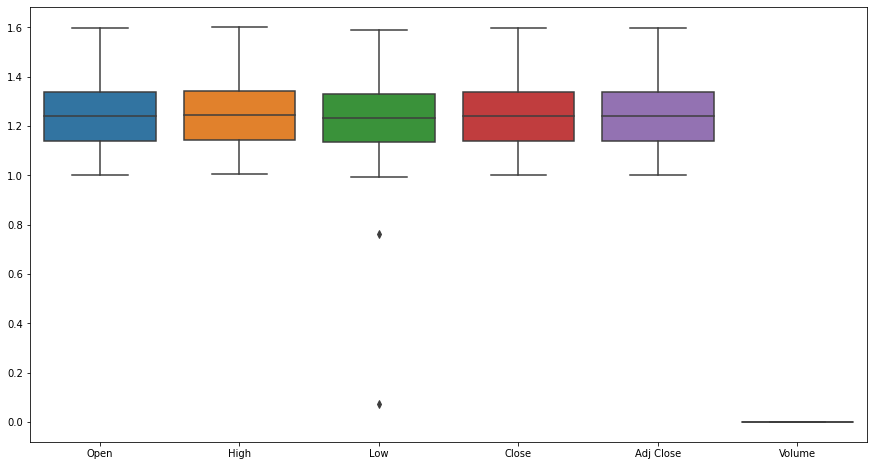

In [ ]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64']
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numerical_col])
plt.show()

Dari visualisasi di atas, hanya kolom "Low" yang memiliki outlier. Untuk mengatasi outlier pada data ada beberapa teknik. Namun kita akan menggunakan IQR Method yaitu dengan menghapus data yang berada diluar IQR

In [ ]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
bottom = Q1 - 1.5 * IQR
top = Q3 + 1.5 * IQR
df = df[~((df < bottom) | (df > top)).any(axis=1)]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0.0
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0.0
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0.0
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0.0
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0.0


In [ ]:
print(f'The data has {df.shape[0]} records and {df.shape[1]} columns.')

The data has 4884 records and 7 columns.


### Univariate Analysis

Fitur yang akan kita prediksi adalah "Adj Close", sehingga fokus kita hanya menganalisis korelasi pada fitur tersebut

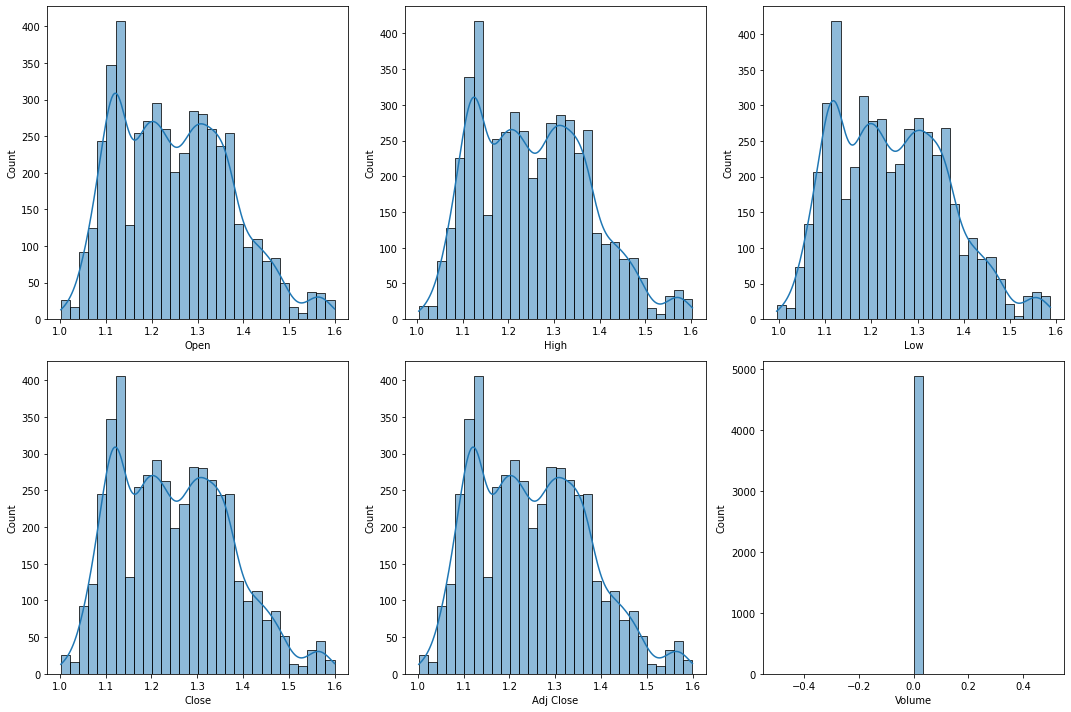

In [ ]:
cols = 3
rows = 2
fig = plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col):
  ax = fig.add_subplot(rows, cols, i + 1)
  sns.histplot(x=df[col], bins=30, kde=True, ax=ax)
fig.tight_layout()
plt.show()

### Multivariate Analysis

Selanjutnya kita akan menganalisis korelasi fitur "Adj Close" terhadap fitur lain seperti "Open", "High", "Low", "Close" dan "Volume". Dapat disimpulkan bahwa "Adj Close" memiliki korelasi positif yang kuat terhadap "Open", "High", "Low" dan "Close", sedangkan untuk fitur "Volume" memiliki korelasi sedang terhadap fitur "Adj Close"

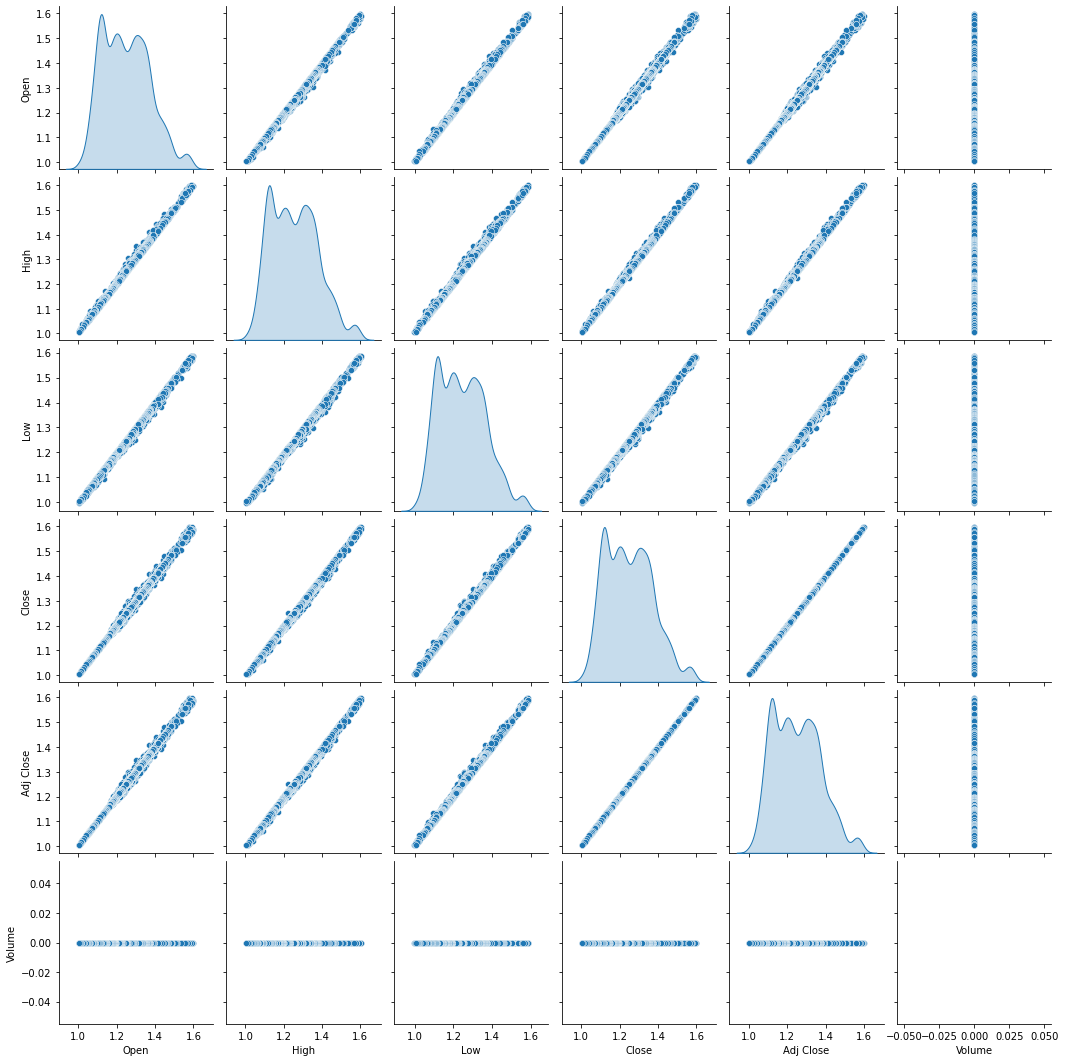

In [ ]:
sns.pairplot(df[numerical_col], diag_kind='kde')
plt.show()

Untuk melihat korelasi lebih jelas, kita dapat menggunakan heatmap dari library seaborn

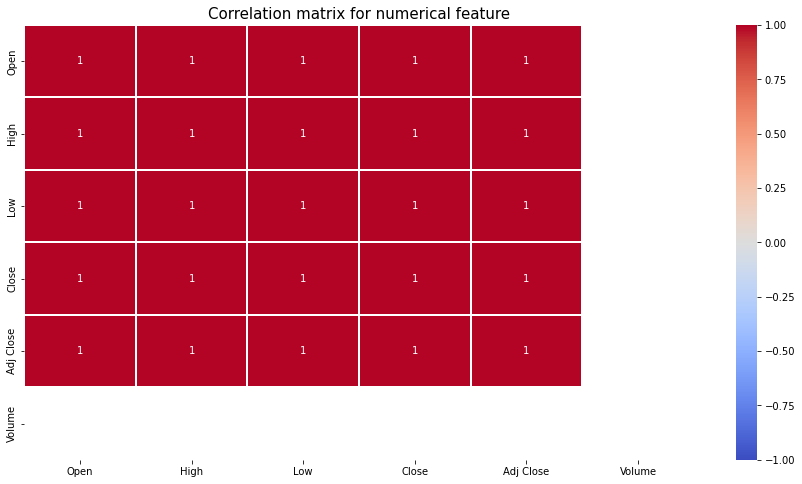

In [ ]:
plt.figure(figsize=(15,8))
corr = df[numerical_col].corr().round(2)
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidth=1)
plt.title('Correlation matrix for numerical feature', size=15)
plt.show()

# Data Preparation

---

Kita akan menghapus kolom "Date", "Volume", dan "Close" karena tidak diperlukan oleh model. Data tersebu akan mengganggu model dalam proses training.

In [ ]:
df = df.drop(['Date', 'Volume', 'Close'], axis=1)
df.head()

,Open,High,Low,Adj Close
0,1.203398,1.204007,1.194401,1.196501
1,1.196101,1.210903,1.194600,1.208897
2,1.209000,1.213003,1.207700,1.212298
3,1.212004,1.214403,1.204398,1.208094
4,1.207802,1.219096,1.206593,1.218695


### Splitting Dataset

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
print('Total X_train:', len(X_train), 'records')
print('Total y_train:', len(y_train), 'records')
print('Total X_test:', len(X_test), 'records')
print('Total y_test:', len(y_test), 'records')

Total X_train: 3907 records
Total y_train: 3907 records
Total X_test: 977 records
Total y_test: 977 records


### Data Normalization

Untuk melakukan normalisasi data kita akan menggunakan library MinMaxScaler. Fungsi normalisasi pada data agar model lebih cepat dalam mempelajari data karena data telah diubah pada rentang tertentu seperti antara 0 dan 1

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'], index=['SVR', 'KNN', 'GradientBoosting'])

# Modeling

---

### Hyperparameter Tuning
Hyperparameter tuning adalah salah satu teknik yang dilakukan akan model dapat berjalan dengan performa terbaik. Biasanya dalam hyperparameter tuning, hyperparameter akan ditentukan secara acak oleh teknisi. Namun jika tidak ingin mencoba coba hyperparameter mana yang terbaik, kita dapat menggunakan GridSearch. GridSearch merupakan sebuah teknik yang memungkinkan kita untuk menguji beberapa hyperparameter sekaligus pada sebuah model

In [ ]:
def grid_search(model, hyperparameters):
  results = GridSearchCV(
      model,
      hyperparameters,
      cv=5,
      verbose=1,
      n_jobs=6
  )

  return results

In [ ]:
svr = SVR()
hyperparameters = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 10, 100, 1000],
    'gamma': [0.3, 0.03, 0.003, 0.0003]
}

svr_search = grid_search(svr, hyperparameters)
svr_search.fit(X_train, y_train)
print(svr_search.best_params_)
print(svr_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}
0.9205332285536054


In [ ]:
gradient_boost = GradientBoostingRegressor()
hyperparameters = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'n_estimators': [250, 500, 750, 1000],
    'criterion': ['friedman_mse', 'squared_error']
}

gradient_boost_search = grid_search(gradient_boost, hyperparameters)
gradient_boost_search.fit(X_train, y_train)
print(gradient_boost_search.best_params_)
print(gradient_boost_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 1000}
0.99907071135876


In [ ]:
knn = KNeighborsRegressor()
hyperparameters = {
    'n_neighbors': range(1, 10)
}

knn_search = grid_search(knn, hyperparameters)
knn_search.fit(X_train, y_train)
print(knn_search.best_params_)
print(knn_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 9}
0.9990954542587748


### Model Training

In [ ]:
svr = SVR(C=10, gamma=0.3, kernel='rbf')
svr.fit(X_train, y_train)

SVR(C=10, gamma=0.3)

In [ ]:
gradient_boost = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.01, n_estimators=1000)
gradient_boost.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.01,
                          n_estimators=1000)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

### Model Evaluation

In [ ]:
model_dict = {
    'SVR': svr,
    'GradientBoosting': gradient_boost,
    'KNN': knn,
}

for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_train, model.predict(X_train))
  models.loc[name, 'test_mse'] = mean_squared_error(y_test, model.predict(X_test))

models.head()

,train_mse,test_mse
SVR,0.00115,0.001133
KNN,0.00001,0.00001
GradientBoosting,0.000008,0.000011


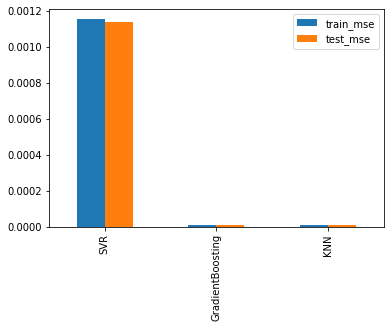

In [ ]:
models.sort_values(by='test_mse', ascending=False).plot(kind='bar', zorder=3)